In [1]:
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn. compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#from xgboost import XGBClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn. tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib. ticker as mtick
from IPython.display import display
pd. options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [3]:
df=pd.read_csv('user_data.csv',encoding='utf-8')
df=df.dropna()

In [7]:
df['churn_mean_term'] = df['churn_mean_term'].astype('category').cat.codes
df['churn_1_month'] = df['churn_1_month'].astype('category').cat.codes
df['churn_3_months'] = df['churn_3_months'].astype('category').cat.codes
df['churn_6_months'] = df['churn_6_months'].astype('category').cat.codes
df['user_info'] = df['user_info'].astype('category').cat.codes
df

,user_id,level,user_info,product_option,total_purchase_amount,average_purchase_amount,unique_brands,unique_brands_list,average_review_length,helpful_count,hash_id,star_rating,의류,신발 및 가방,액세서리 및 뷰티,기타,count,average_purchase_cycle_total,average_purchase_cycle_unique,mean_term,max_term,variance_term,most_recent_review_date,churn_mean_term,churn_1_month,churn_3_months,churn_6_months,ratio_reviews_in_spring,ratio_reviews_in_summer,ratio_reviews_in_autumn,ratio_reviews_in_winter,variance_term_standardized
0,!!??!?,3,0,NONE,675600,35557,7,"로토토베베, 꿈비, 루솔, 슬로우애시드, 그로미미, 마르헨제이, 카카오프렌즈",58,1,233181189d605b329f38733024dc0063,4.79,0.29,0.12,0.12,0.47,19,23.89,56.75,64.86,175.0,4945.14,2024-06-21,0,1,0,0,0.63,0.11,0.26,0.00,-0.083783
1,!!ㅇㅈㅁ!!,4,1,FREE,1772040,53698,25,"일리오, 아수라, 플레이스 스튜디오, 나이스고스트클럽, 아카이브 볼드, 해비즘, 바...",43,0,99574099d1f8cc0f4b6bbb0d4d2ff23c,4.42,0.46,0.14,0.29,0.11,33,17.97,65.89,74.12,316.0,10785.55,2024-05-26,0,1,0,0,0.21,0.00,0.30,0.48,0.286893
2,!i!i!,6,0,L,2985540,74638,24,"그루브라임, 무신사 스탠다드, 브렌슨, 라퍼지스토어, 디스이즈네버댓, 코드그라피, ...",60,4,43af2a81116e1b648bd338da1ad35622,5.00,0.62,0.04,0.27,0.08,40,13.62,49.55,54.50,231.0,5721.61,2024-04-06,1,1,1,0,0.08,0.00,0.42,0.50,-0.034502
3,!•c•!,5,1,FREE,3359680,62216,28,"아조바이아조, 토피, 지프, 브랜디드, 굿라이프웍스, 로우로우, 덴메이드, 리, 브...",71,69,b73aeb4eae2681743842034bb6d88afa,4.81,0.69,0.07,0.24,0.00,54,16.19,33.62,34.96,140.0,2087.96,2024-06-21,0,1,0,0,0.26,0.22,0.19,0.33,-0.265121
4,!ㅇㅁㅇ!,7,1,L,5315710,56550,37,"피스워커, 쿠어, 꼼파뇨, 무신사 스탠다드, 라임라이크, 세인트제임스, 앤더슨벨, ...",35,1,a0d5ef0092597c579d62587d9619b314,4.88,0.68,0.08,0.13,0.11,94,8.09,31.67,33.04,221.0,2405.04,2024-04-15,1,1,1,0,0.45,0.28,0.10,0.18,-0.244997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34762,힝힝항항홍홍,5,0,L,4637580,54559,41,"무신사 스탠다드, 팔렛, 트래블, 그루브라임, 카멜워크, 트릴리온, 일오공칠, 메종...",34,14,25a643943f7e02eb64b64c2729f4be0f,4.87,0.64,0.09,0.12,0.14,85,9.02,17.43,17.84,124.0,843.09,2024-07-13,0,0,0,0,0.21,0.40,0.21,0.18,-0.344129
34763,힣헿훟힣,4,0,FREE,991890,36736,19,"디스커버리 익스페디션, 블론드나인, 톤즈, 일오공칠, 커버낫, 트릴리온, 어반리브즈...",42,5,c1a5bd3c5d254fb29fc9b229db90a815,4.67,0.42,0.05,0.53,0.00,27,15.93,35.83,39.09,169.0,2495.29,2023-11-01,1,1,1,1,0.00,0.22,0.74,0.04,-0.239269
34764,柳,5,0,FREE,6159480,57565,38,"무신사 스탠다드, 아식스, 아디다스, 라퍼지스토어, 노스페이스, 베이직하우스, 어반...",35,7,6651f61bb73d37dea896c4a8d2fd380f,4.98,0.50,0.14,0.18,0.18,107,8.30,15.58,15.86,75.0,346.67,2024-07-13,0,0,0,0,0.24,0.22,0.10,0.43,-0.375636
34765,｡｡,5,1,NONE,1541550,53156,24,"엠엘비, 컨버스, 투쿨포스쿨, 팔렛, 비바스튜디오, 일오공칠, 안다르, 키뮤어, 메...",54,1,948af1ae60d89122d53de05b5690f38a,4.93,0.52,0.13,0.35,0.00,29,26.59,59.31,64.25,404.0,13626.57,2024-05-23,0,1,0,0,0.38,0.10,0.34,0.17,0.467205


In [9]:
df_review=pd.read_csv('review/review_keyword_40000.csv', encoding='utf-8')
df=pd.merge(df, df_review[['user_id', 'keywords_by_frequency','keywords_by_similarity']], on='user_id', how='left')
df['keywords_by_frequency'] = df['keywords_by_frequency'].fillna('')
df['keywords_by_similarity'] = df['keywords_by_similarity'].fillna('')
df['keywords_by_frequency'] = df['keywords_by_frequency'].apply(lambda x: ' '.join(x.split(', ')))
df['keywords_by_similarity'] = df['keywords_by_similarity'].apply(lambda x: ' '.join(x.split(', ')))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the keywords
vectorizer_freq = CountVectorizer()
vectorizer_sim = CountVectorizer()

keywords_by_frequency_matrix = vectorizer_freq.fit_transform(df['keywords_by_frequency'])
keywords_by_similarity_matrix = vectorizer_sim.fit_transform(df['keywords_by_similarity'])

# Convert to DataFrame
keywords_by_frequency_df = pd.DataFrame(keywords_by_frequency_matrix.toarray(), columns=vectorizer_freq.get_feature_names_out())
keywords_by_similarity_df = pd.DataFrame(keywords_by_similarity_matrix.toarray(), columns=vectorizer_sim.get_feature_names_out())

# Ensure column names do not overlap
keywords_by_similarity_df = keywords_by_similarity_df.add_suffix('_sim')

# Drop original keyword columns and concatenate new keyword feature dataframes
df = df.drop(columns=['keywords_by_frequency', 'keywords_by_similarity'])
df = pd.concat([df, keywords_by_frequency_df, keywords_by_similarity_df], axis=1)
df

,user_id,level,user_info,product_option,total_purchase_amount,average_purchase_amount,unique_brands,unique_brands_list,average_review_length,helpful_count,hash_id,star_rating,의류,신발 및 가방,액세서리 및 뷰티,기타,count,average_purchase_cycle_total,average_purchase_cycle_unique,mean_term,max_term,variance_term,most_recent_review_date,churn_mean_term,churn_1_month,churn_3_months,churn_6_months,ratio_reviews_in_spring,ratio_reviews_in_summer,ratio_reviews_in_autumn,ratio_reviews_in_winter,variance_term_standardized,가격,가능하다,가방,가볍다,가성비,가슴,가을,가죽,갈다,감다,감사하다,강력,강추,갖다,개다,거품,걱정,건조기,건지다,검정,겨울,고급스럽다,고르다,고민,공간,광택,괜찮다,굉장하다,교환,구김,구매,구성,구입,굿굿,귀엽다,그것,그대로,그레이,근본,기간,기다,기대,기대하다,기모,기본,기분,기장,기준,길다,길이,깔끔하다,깔다,꼼꼼하다,꾸다,끌리다,나가다,나름,나쁘다,나인,날씨,남아,남자친구,남편,냄새,너무나,넉넉하다,넓다,넣다,네이비,높다,느낌,늘다,늘어나다,늦다,니트,다니다,다드,다르다,다리,다양하다,다운,다크,단독,단추,달라,달라붙다,대비,대신,덥다,데님,데일리,도착,도톰하다,독특하다,돌다,돌리다,동생,동일하다,되게,두껍다,두께,두루,두툼해,둘레,드네,드디어,드리다,득템,들어가다,들어서다,듭니,등산,디자인,디테일,따다,따뜻하다,딱딱하다,딱이다,떨어지다,똑같다,뜨다,라이트,라지,러닝,레이어,레터링,로고,루즈,리하,린넨,마감,마뚜루,마르다,마음,만들다,만에,만족,만족스럽다,만족하다,많다,말다,말리다,맛있다,맛집,맞다,매력,매일,매장,매치,매트,맨날,맨투맨,머리,먹다,먼지,멋지다,메다,모델,모자,무게,무난,무드,무릎,무신,무조건,무지,무탠,무탠다드,물건,물다,미치다,믿다,밉다,밑단,바닥,바라다,바르다,바지,박다,박스,반스,발림,발볼,발색,밝다,배송,번창,벌써,벨트,변형,별로,보기,보내다,보들보들하다,보리,보온,보이,보통,보풀,부담,부드럽다,불편하다,붙다,뷰티,브라운,브랜드,블랙,블프,비니,비다,비싸다,비치다,빈티,빠르다,빠지다,빨다,빨리,뿌리다,사고,사다,사람,사면,사보다,사서,사실,사용,사이,사이즈,사주다,사진,살다,살짝,상당하다,상세,상태,상품,색감,색깔,색도,색상,생각,서다,선명하다,선물,선택,설명,성비,세미,세탁,세트,셔츠,소재,수고,수납,수분,수선하다,수영복,순하다,쉐입,쉬다,스럽게,스타일,스타일링,스탠다드,스트릿,스트링,스펙,슬랙스,슬림,시원하다,신고,신기,신다,신랑,신발,신축,실물,실버,실제,심플,싸다,쌀쌀하다,쏘다,쓰기,쓸다,아기,아들,아디다스,아래,아무,아쉽다,아웃,아이보리,아이템,아주,아프다,안경,애용,야무지다,얇다,양말,어깨,어둡다,어울리다,얼굴,엄마,엉덩이,에도,에서도,에스,여기저기,여름,여유,여자친구,여행,연출,예쁘다,예정,오래,오버,오버핏,옷감,와이드,와이프,완벽하다,요새,요즘,용도,용량,운동,워싱,원단,원하다,웨어,유니크,유명하다,유용하다,유지,으로도,은근,은은하다,의사,이라서,이만,이며,이용,이유,이지,일가,일리,일반,일해,입다,입문,입어보다,입히다,자극,자수,자연스럽다,자주,자켓,작다,잘살다,잡다,장만,재질,저녁,저렴하다,적당,적당하다,적립금,전반,전체,전투,접다,정핏,제법,제품,조절,조합,좁다,좋다,좋아하다,주름,주머니,주문,줄이다,줍다,지도,지속,지인,지퍼,질감,질도,집업,짧다,짱짱,짱짱하다,찌다,찍다,차콜,착용,착하다,찰떡,참고,찾다,처리,처음,청바지,체형,초여름,촉감,촉촉하다,최고,추가,추다,추천,출근,치수,친구,카드,커버,커서,커플,컬러,케이스,코디,코트,쿠션,쿠어,쿠폰,퀄리티,크게,크기,크다,크롭,크림,클래식,타이,탄탄하다,톡톡하다,통풍,특유,특이하다,튼튼하다,티셔츠,파다,패드,패딩,팬츠,편안하다,편이,편입,편하다,평범하다,평소,포인트,포장,폴로,푹신하다,품절,품질,프린트,프린팅,피부,필수,필요하다,핏감,핏되,핑크,하루,학년,한여름,할인,합리,항상,해보다,해봤다,해주다,햇빛,행사,향수,허리,허벅지,화면,화이트,확실하다,활동,활용,효과,후기,후드,후회,훌륭하다,휘뚜루,흡수,희다,흰색,가볍다_sim,가성비_sim,감사하다_sim,고민_sim,괜찮다_sim,구매_sim,구입_sim,귀엽다_sim,그것_sim,기다_sim,기본_sim,깔끔하다_sim,느낌_sim,니트_sim,다니다_sim,두껍다_sim,디자인_sim,따뜻하다_sim,딱이다_sim,마음_sim,만족_sim,만족스럽다_sim,만족하다_sim,맞다_sim,무난_sim,바지_sim,배송_sim,별로_sim,사다_sim,사용_sim,사이즈_sim,살짝_sim,색감_sim,색상_sim,생각_sim,선물_sim,셔츠_sim,스타일_sim,신다_sim,싸다_sim,쓰다_sim,아쉽다_sim,아주_sim,어울리다_sim,여자_sim,예쁘다_sim,요즘_sim,원하다_sim,일리_sim,입다_sim,재질_sim,저렴하다_sim,제품_sim,좋다_sim,좋아하다_sim,착용_sim,최고_sim,추워지다_sim,추천_sim,컬러_sim,코디_sim,퀄리티_sim,편이_sim,편하다_sim,포인트_sim,포장_sim,필요하다_sim
0,!!??!?,3,0,NONE,675600,35557,7,"로토토베베, 꿈비, 루솔, 슬로우애시드, 그로미미, 마르헨제이, 카카오프렌즈",58,1,233181189d605b329f38733024dc0063,4.79,0.29,0.12,0.12,0.47,19,23.89,56.75,64.86,175.0,4945.14,2024-06-21,0,1,0,0,0.63,0.11,0.26,0.00,-0.083783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [13]:
X = df.drop(columns=['user_id','product_option','unique_brands_list','hash_id','most_recent_review_date','churn_mean_term','churn_1_month','churn_3_months','churn_6_months'])
y = df['churn_3_months']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27813, 587)
(27813,)
(6954, 587)
(6954,)


In [15]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns=X_train.columns.values
X_train_scaled.index=X_train.index.values
X_train=X_train_scaled

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns=X_test.columns.values
X_test_scaled.index=X_test.index.values
X_test=X_test_scaled

In [ ]:
models = []
models. append (('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models. append (('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append (('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models. append (('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models. append(('Gaussian NB', GaussianNB()))
models. append (('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy',random_state=0)))
models. append (('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy',random_state=0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names=[]
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame (columns=col)
i = 0

# evaluate each model using k-fold cross-validation

for name, model in models:

    print("Start %s in %s" %(name, model))
    
    kfold = model_selection.KFold (
        n_splits=10, shuffle=True, random_state=0)
    cv_acc_results=model_selection.cross_val_score(
        model,X_train, y_train, cv=kfold,scoring='accuracy')
    cv_auc_results=model_selection.cross_val_score(
        model,X_train, y_train, cv=kfold,scoring='roc_auc')

    acc_results. append (cv_acc_results)    
    auc_results. append (cv_auc_results)    
    names . append (name)    
    model_results. loc[i] = [name,    
        round (cv_auc_results.mean()*100, 2),
        round (cv_auc_results.std()*100, 2),
        round (cv_acc_results.mean()*100, 2),
        round (cv_acc_results.std ()*100, 2)]
    
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

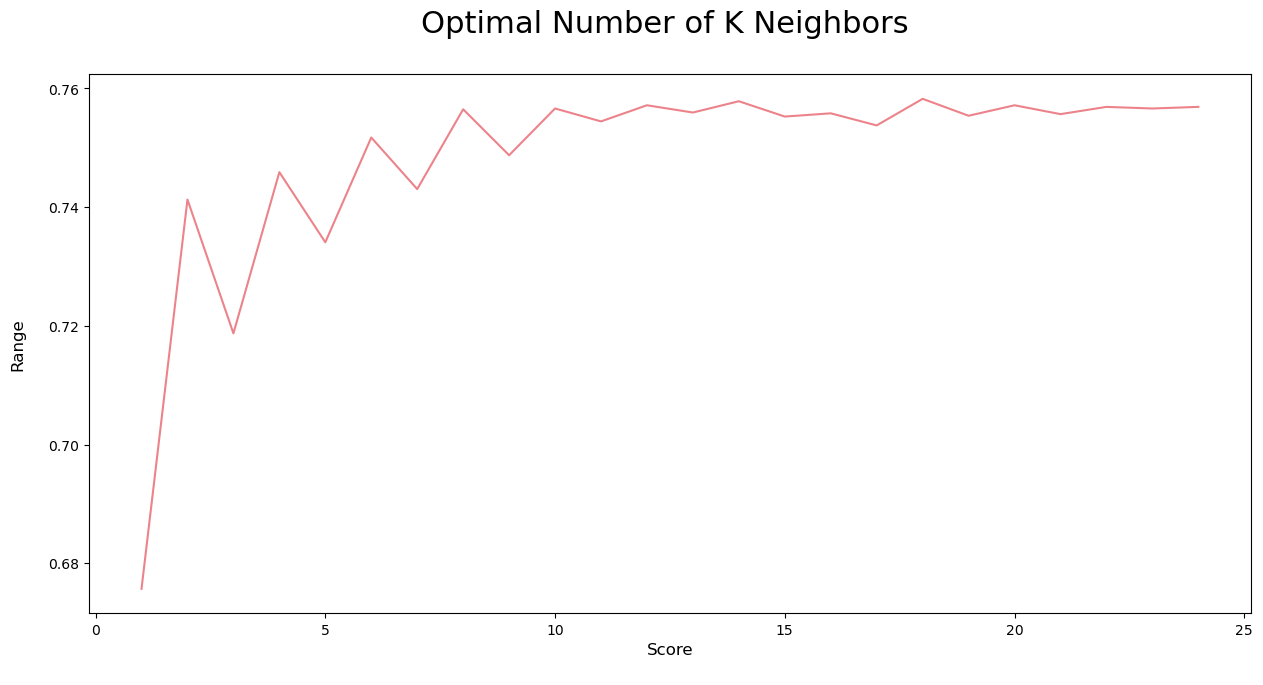

In [99]:
score_array = []
for each in range(1,25) :
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3    
    knn_loop. fit(X_train,y_train)
    score_array. append (knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25), score_array, color = '#ec838a')
plt.ylabel('Range\n', horizontalalignment="center", fontstyle = "normal", fontsize = "large")
plt.xlabel('Score\n', horizontalalignment="center", fontstyle = "normal", fontsize = "large")
plt. title('Optimal Number of K Neighbors \n', horizontalalignment="center", fontstyle ='normal', fontsize='22')
#plt. legend (loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

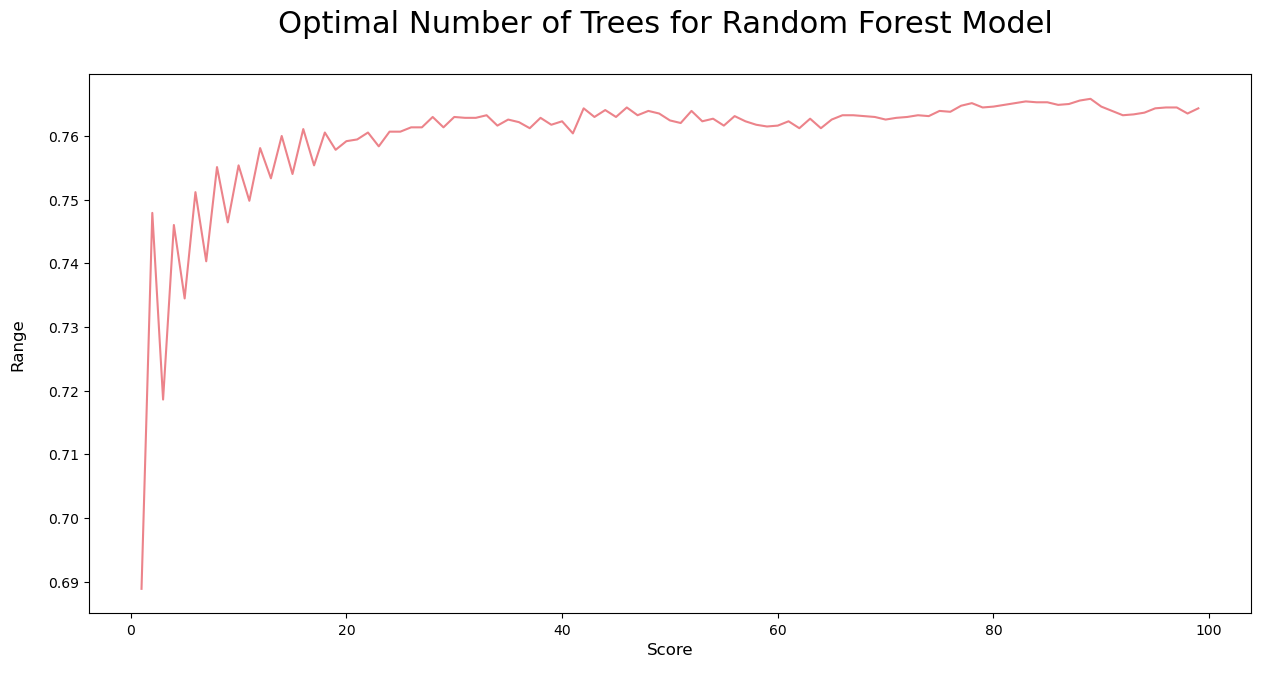

In [100]:
score_array = []
for each in range(1,100) :
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array. append (rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100), score_array, color = '#ec838a')
plt.ylabel('Range\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large",fontfamily = "sans-serif")
plt.xlabel('Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large",fontfamily = "sans-serif")
plt. title('Optimal Number of Trees for Random Forest Model \n', horizontalalignment="center",fontstyle="normal", fontsize="22")
#plt. legend (loc='top right', fontsize = "medium")
plt.xticks (rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt. show()

In [17]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd. DataFrame([['Logistic Regression',acc, prec, rec, f1, f2]], columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.790768   0.587473  0.177083  0.272136  0.205842


In [ ]:
# # Fitting SVM (SVC class) to the Training set
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)
# # Predicting the Test set results y_pred = classifier.predict(X_test)
# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)
# model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score'])
# results = results.append(model_results, ignore_index = True)
# results = results.sort_values (["Precision","Recall", "F2 Score"], ascending = False)
# print (results)

In [ ]:
# # Fitting KNN to the Training set:
# classifier = KNeighborsClassifier(n_neighbors = 22,metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)
# # Predicting the Test set results
# y_pred = classifier.predict(X_test)
# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)
# model_results = pd.DataFrame([['K-Nearest Neighbours',acc, prec, rec, f1, f2]], columns = ['Model','Accuracy', 'Precision', 'Recall','F1 Score', 'F2 Score'])
# results = results.append(model_results, ignore_index = True)
# results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
# print (results)

In [ ]:
# # Fitting Kernel SVM to the Training set:
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)
# # Predicting the Test set results
# y_pred = classifier.predict(X_test)
# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)
# model_results = pd.DataFrame ([['Kernel SVM', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score'])
# results = results.append(model_results, ignore_index = True)
# results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
# print (results)

In [19]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.790768   0.587473  0.177083  0.272136  0.205842
1        Decision Tree  0.727783   0.388088  0.402995  0.395401  0.399922


C:\Users\duwjd\AppData\Local\Temp\ipykernel_15648\3015025612.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [21]:
# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = 72,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values (["Precision","Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2        Random Forest  0.792781   0.702128  0.107422  0.186335  0.129331
0  Logistic Regression  0.790768   0.587473  0.177083  0.272136  0.205842
1        Decision Tree  0.727783   0.388088  0.402995  0.395401  0.399922


C:\Users\duwjd\AppData\Local\Temp\ipykernel_15648\2740871310.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [60]:
exclude_columns=['user_id','product_option','unique_brands_list','hash_id','most_recent_review_date','churn_mean_term','churn_1_month','churn_3_months','churn_6_months']
features=[col for col in df.columns if col not in exclude_columns]

In [41]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

importances = classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                           Feature    Importance
18         ratio_reviews_in_summer  6.048569e-02
20         ratio_reviews_in_winter  5.222982e-02
12    average_purchase_cycle_total  5.013545e-02
17         ratio_reviews_in_spring  4.250519e-02
11                           count  4.073370e-02
3                    unique_brands  3.956411e-02
16                   variance_term  3.952618e-02
21      variance_term_standardized  3.949443e-02
2          average_purchase_amount  3.920072e-02
15                        max_term  3.873668e-02
14                       mean_term  3.855147e-02
1            total_purchase_amount  3.841276e-02
19         ratio_reviews_in_autumn  3.829564e-02
13   average_purchase_cycle_unique  3.802922e-02
4            average_review_length  3.433225e-02
7                               의류  3.318210e-02
9                        액세서리 및 뷰티  3.148691e-02
8                          신발 및 가방  3.103874e-02
5                    helpful_count  2.784287e-02
6                   